## Construct the EDA report for your dataset.
#### ▪ Students with mod( ID_last_two_digits, 2) = 0 will use Boston Housing Data
#### ▪ Students with mod( ID_last_two_digits, 2) = 1 will use Wine Quality Data.


In [45]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn import datasets
import statsmodels as sts
import statsmodels.api as sm
from scipy import stats
# import plotly as py
# from plotly.offline import iplot
# import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
%matplotlib inline


In [21]:
# X is the two last digits of my ID
X=67
mod=X%2
# Found the mod value is 1 So my selected data set is Wine Quality Data Set:


#### 1(i) Read the data and construct some appropriate graphs for each of the variables with interpretation.

In [48]:
df=pd.read_csv("winequality-white.csv",delimiter=";")

##### Appending the rows given in the assignment including the last 2 digits of ID with a decimal point

In [39]:


datarowsSeries = [pd.Series([7.8,.88,0.00,1.9,0.09,25.0,67.0,.991,3.22,0.68,9.8,5], index=df.columns ),
pd.Series([7.2,.83,0.01,2.2,0.19,15.0,60.0,.996,3.52,0.55,9.6,6], index=df.columns ),
pd.Series([7.9,.89,0.01,1.7,0.08,22.0,57.0,.997,3.26,0.64,9.8,2], index=df.columns ),
pd.Series([7.7,.86,0.02,2.3,0.07,11.0,38.0,.994,3.12,0.08,9.4,3], index=df.columns ) ]

nds=pd.DataFrame(datarowsSeries)

# dotX is the two last digits of my ID with decimal point 
dotX=.67

for item in nds:
   nds[item]=nds[item]+dotX

# Append the data set to main data set 
df_white=df.append(nds,ignore_index=True)

 

C:\Users\sobuj\AppData\Local\Temp\ipykernel_42288\3423968720.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_white=df.append(nds,ignore_index=True)


##### Follow the below historgam for each of the variables

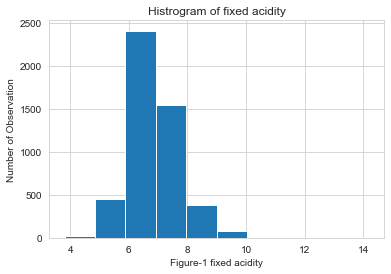

Figure 1 shows that overall fixed acidity of white wine is symmetric and middle 50% has the symmetric distribution with an average 6.8 and also there are outliers. Figure 3 also gives the similar information about the shape of the distribution and majority fixed acid values are in a range of 6 to 8.


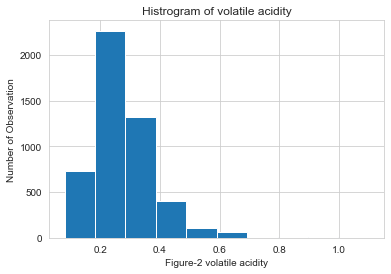

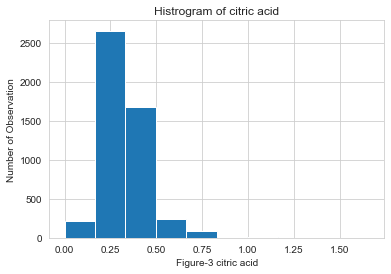

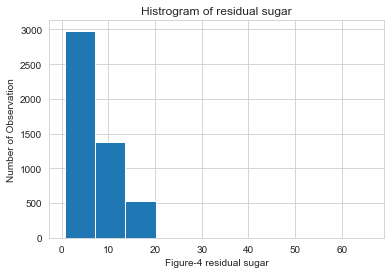

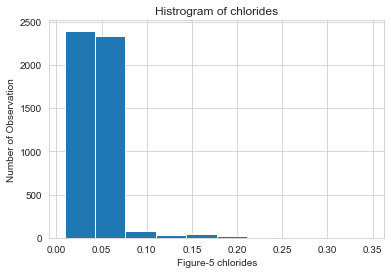

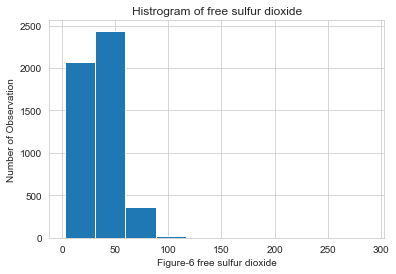

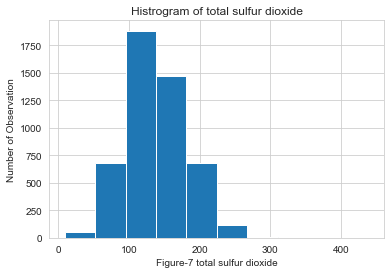

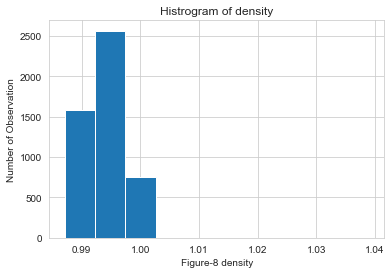

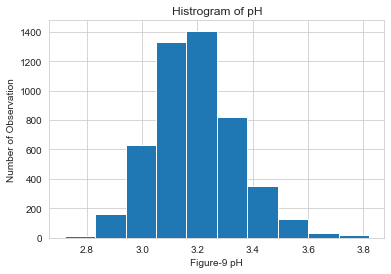

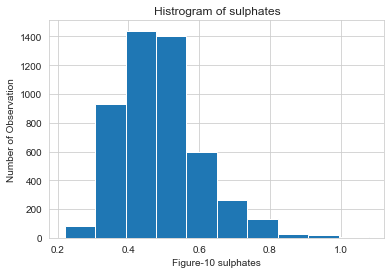

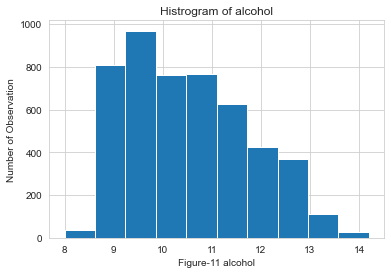

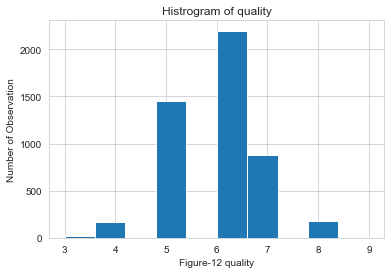

In [53]:
indx=0
for col in df.columns:
    indx=indx+1
    plt.hist(df[col],bins=10)
    plt.xlabel('Figure-'+str(indx)+ ' '+col)
    plt.ylabel('Number of Observation')
    plt.title('Histrogram of '+ col)
    plt.show()

    if(indx==1):
        print("Figure "+str(indx)+ " shows that overall fixed acidity of white wine is symmetric and middle 50% has the symmetric distribution with an average 6.8 and also there are outliers. Figure 3 also gives the similar information about the shape of the distribution and majority fixed acid values are in a range of 6 to 8.")
    if (indx==2):
        print("Figure "+str(indx)+ " shows that overall volatile acidity of white wine is about symmetric and middle 50% has the symmetric distribution with an average 0.28 and also there are outliers above 0.50. Figure 5 also gives the similar information about the shape of the distribution and majority volatile acid values are in a range of 0.17 to 0.38.")
    if (indx==3):
        print("Figure "+str(indx)+ " shows that majority volatile acid values are in a range of 0.14 to 0.48.")
    if (indx==4):
        print("Figure "+str(indx)+ " shows that overall residual sugar of white wine has positively skewed distribution and middle 50% has a symmetric distribution and also there are few outliers. Figure 9 shows that majority residual sugar values are highly concentrated between 1 and 6.")
    if (indx==5):
        print("Figure "+str(indx)+ " it is found that both the overall and middle 50% of chlorides of white wine have symmetric distribution with some outliers. Figure 11 shows that majority chlorides values are highly concentrated between 0.01 and 0.07.")
    if (indx==6):
        print("Figure "+str(indx)+ " it is found that both the overall and middle 50% of Free Sulfur Dioxide of white wine have symmetric distribution with some outliers. Figure 13 shows that majority of Free Sulfur Dioxide values are highly concentratedaround between 1 and 60.")
    if (indx==7):
        print("Figure "+str(indx)+ " 4 it is found that both the overall distribution of Total Sulfur Dioxide of white wine is symmetric and middle 50% has about symmetric distribution, also there are some outliers. Figure 15 shows that majority of Free Sulfur Dioxide values are highly concentrated around between 100 and 170.")
    if (indx==8):
        print("Figure "+str(indx)+ " it is found that both the overall and middle 50% of Density of white wine have symmetric distribution with some outliers. Figure 17 shows that majority of Density values are highly concentrated around between 0.30 and 0.75.")
    if (indx==9):
        print("Figure "+str(indx)+ " it is found that both the overall distribution of Sulphates of white wine is symmetric and middle 50% has about symmetric distribution, also there are some outliers. Figure 21 shows that majority of Sulphates values are highly concentrated around between 0.35 and 0.60.")
    if (indx==10):
        print("Figure "+str(indx)+ " it is found that both the overall distribution of alcohol of white wine is slightly positively skewed and middle 50% has symmetric distribution, there is no outlier. Figure 23 shows that majority of Alcohol values are highly concentrated around between 8.60 and 11.60")
    if (indx==12):
        print("Figure "+str(indx)+ "  it is found that both the overall distribution of quality of white wine is symmetric and middle 50% has negatively skewed distribution, there are few outliers. Figure 25 shows that majority of quality values are highly concentrated around between 5 and 6.")
    
    






Figure 1 shows that overall fixed acidity of white wine is symmetric and middle 50% has the symmetric distribution with an average 6.8 and also there are outliers. Figure 3 also gives the similar information about the shape of the
distribution and majority fixed acid values are in a range of 6 to 8.


#### (ii) Calculate some measures (if appropriate), for instance, mean, median, mode, minimum, maximum, quartiles, Standard deviation, etc., for each of the variables according to their level of measurements. Also, calculate ovariance matrix and correlation-matrix of the variables.

In [40]:
##  Calculate some measures (if appropriate), for instance, mean, median, mode, minimum, maximum, quartiles, Standard deviation for each of the variables according to their level of measurements
df_white.describe().T


count        mean        std      min        25%  \
fixed acidity         4902.0    6.855983   0.844596  3.80000    6.30000   
volatile acidity      4902.0    0.279267   0.106957  0.08000    0.21000   
citric acid           4902.0    0.334474   0.121373  0.00000    0.27000   
residual sugar        4902.0    6.388399   5.071091  0.60000    1.70000   
chlorides             4902.0    0.046369   0.030257  0.00900    0.03600   
free sulfur dioxide   4902.0   35.294712  17.007372  2.00000   23.00000   
total sulfur dioxide  4902.0  138.293590  42.546615  9.00000  108.00000   
density               4902.0    0.994574   0.019379  0.98711    0.99173   
pH                    4902.0    3.188888   0.152557  2.72000    3.09000   
sulphates             4902.0    0.490392   0.115864  0.22000    0.41000   
alcohol               4902.0   10.514109   1.230140  8.00000    9.50000   
quality               4902.0    5.876924   0.887100  2.67000    5.00000   

                            50%       75%      max  
fixed acidity           6.80000    7.3000   14.200  
volatile acidity        0.26000    0.3200    1.560  
citric acid             0.32000    0.3900    1.660  
residual sugar          5.20000    9.9000   65.800  
chlorides               0.04300    0.0500    0.860  
free sulfur dioxide    34.00000   46.0000  289.000  
total sulfur dioxide  134.00000  167.0000  440.000  
density                 0.99375    0.9961    1.667  
pH                      3.18000    3.2800    4.190  
sulphates               0.47000    0.5500    1.350  
alcohol                10.40000   11.4000   14.200  
quality                 6.00000    6.0000    9.000

In [26]:
df_white.mode()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.8              0.28          0.3             1.2      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 29.0                 111.0    0.992  3.14        0.5   

   alcohol  quality  
0      9.4      6.0

In [27]:
df_white.mode()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.8              0.28          0.3             1.2      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 29.0                 111.0    0.992  3.14        0.5   

   alcohol  quality  
0      9.4      6.0

In [28]:
# covariance matrix
df_white.cov()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              0.713342         -0.000422     0.029921   
volatile acidity          -0.000422          0.011440    -0.001467   
citric acid                0.029921         -0.001467     0.014731   
residual sugar             0.376260          0.029047     0.056740   
chlorides                  0.001290          0.000904     0.000508   
free sulfur dioxide       -0.727299         -0.182890     0.188822   
total sulfur dioxide       3.164977          0.297835     0.599243   
density                    0.001470          0.000695     0.000243   
pH                        -0.053337          0.000293    -0.002775   
sulphates                 -0.000848          0.000275     0.001047   
alcohol                   -0.125648          0.008196    -0.011325   
quality                   -0.086587         -0.018627    -0.001331   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.376260   0.001290            -0.727299   
volatile acidity            0.029047   0.000904            -0.182890   
citric acid                 0.056740   0.000508             0.188822   
residual sugar             25.715963   0.007617            25.827977   
chlorides                   0.007617   0.000915             0.027820   
free sulfur dioxide        25.827977   0.027820           289.250714   
total sulfur dioxide       86.707221   0.135652           445.641127   
density                     0.010696   0.000417             0.005990   
pH                         -0.150856   0.000162            -0.011786   
sulphates                  -0.017470   0.000443             0.106865   
alcohol                    -2.809889  -0.009793            -5.226916   
quality                    -0.434195  -0.004731             0.138921   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     3.164977  0.001470 -0.053337  -0.000848   
volatile acidity                  0.297835  0.000695  0.000293   0.000275   
citric acid                       0.599243  0.000243 -0.002775   0.001047   
residual sugar                   86.707221  0.010696 -0.150856  -0.017470   
chlorides                         0.135652  0.000417  0.000162   0.000443   
free sulfur dioxide             445.641127  0.005990 -0.011786   0.106865   
total sulfur dioxide           1810.214409  0.022354 -0.035529   0.609373   
density                           0.022354  0.000376  0.000374   0.000390   
pH                               -0.035529  0.000374  0.023274   0.003113   
sulphates                         0.609373  0.000390  0.003113   0.013425   
alcohol                         -23.443178 -0.002975  0.022429  -0.002521   
quality                          -6.483276 -0.001474  0.012662   0.004849   

                        alcohol   quality  
fixed acidity         -0.125648 -0.086587  
volatile acidity       0.008196 -0.018627  
citric acid           -0.011325 -0.001331  
residual sugar        -2.809889 -0.434195  
chlorides             -0.009793 -0.004731  
free sulfur dioxide   -5.226916  0.138921  
total sulfur dioxide -23.443178 -6.483276  
density               -0.002975 -0.001474  
pH                     0.022429  0.012662  
sulphates             -0.002521  0.004849  
alcohol                1.513244  0.474530  
quality                0.474530  0.786946

In [46]:
# correlation-matrix
corrmat=df_white.corr()

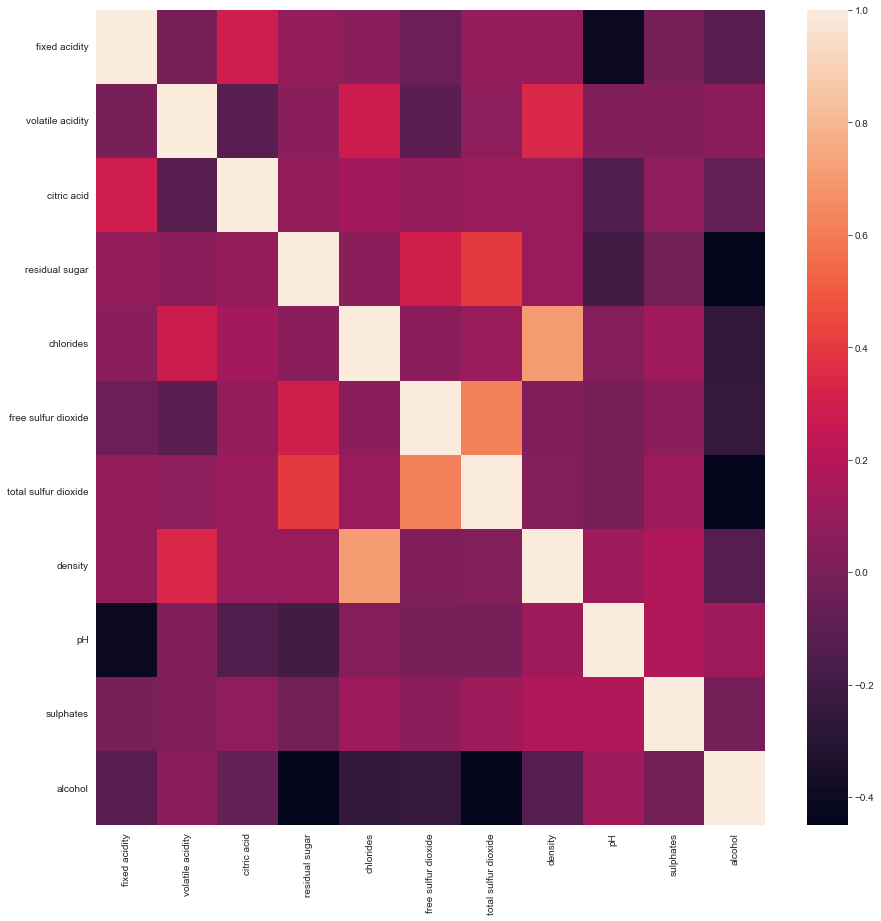

In [47]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corrmat);


#### (iii) Construct the pair plots of those variables with different colors for different wine qualities (Good >5, Bad<=5) in Wine Quality Data.


In [41]:
# Good=Quality>5 and Bad=Quality<=5, defining 2 and 1 respectively
 
 
df_white['quality']=df_white['quality'].where(df_white['quality']<=5,1)
df_white['quality']=df_white['quality'].where(df_white['quality']>5,2)
 
df_white['quality']=df_white['quality'].map({1:'Bad',2:'Good'})
df_white




fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.00              0.27         0.36           20.70      0.045   
1              6.30              0.30         0.34            1.60      0.049   
2              8.10              0.28         0.40            6.90      0.050   
3              7.20              0.23         0.32            8.50      0.058   
4              7.20              0.23         0.32            8.50      0.058   
...             ...               ...          ...             ...        ...   
4897           6.00              0.21         0.38            0.80      0.020   
4898           8.47              1.55         0.67            2.57      0.760   
4899           7.87              1.50         0.68            2.87      0.860   
4900           8.57              1.56         0.68            2.37      0.750   
4901           8.37              1.53         0.69            2.97      0.740   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   45.00                170.00  1.00100  3.00       0.45   
1                   14.00                132.00  0.99400  3.30       0.49   
2                   30.00                 97.00  0.99510  3.26       0.44   
3                   47.00                186.00  0.99560  3.19       0.40   
4                   47.00                186.00  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4897                22.00                 98.00  0.98941  3.26       0.32   
4898                25.67                 67.67  1.66100  3.89       1.35   
4899                15.67                 60.67  1.66600  4.19       1.22   
4900                22.67                 57.67  1.66700  3.93       1.31   
4901                11.67                 38.67  1.66400  3.79       0.75   

      alcohol quality  
0        8.80    Good  
1        9.50    Good  
2       10.10    Good  
3        9.90    Good  
4        9.90    Good  
...       ...     ...  
4897    11.80    Good  
4898    10.47    Good  
4899    10.27    Good  
4900    10.47    Good  
4901    10.07    Good  

[4902 rows x 12 columns]

<Figure size 864x432 with 0 Axes>

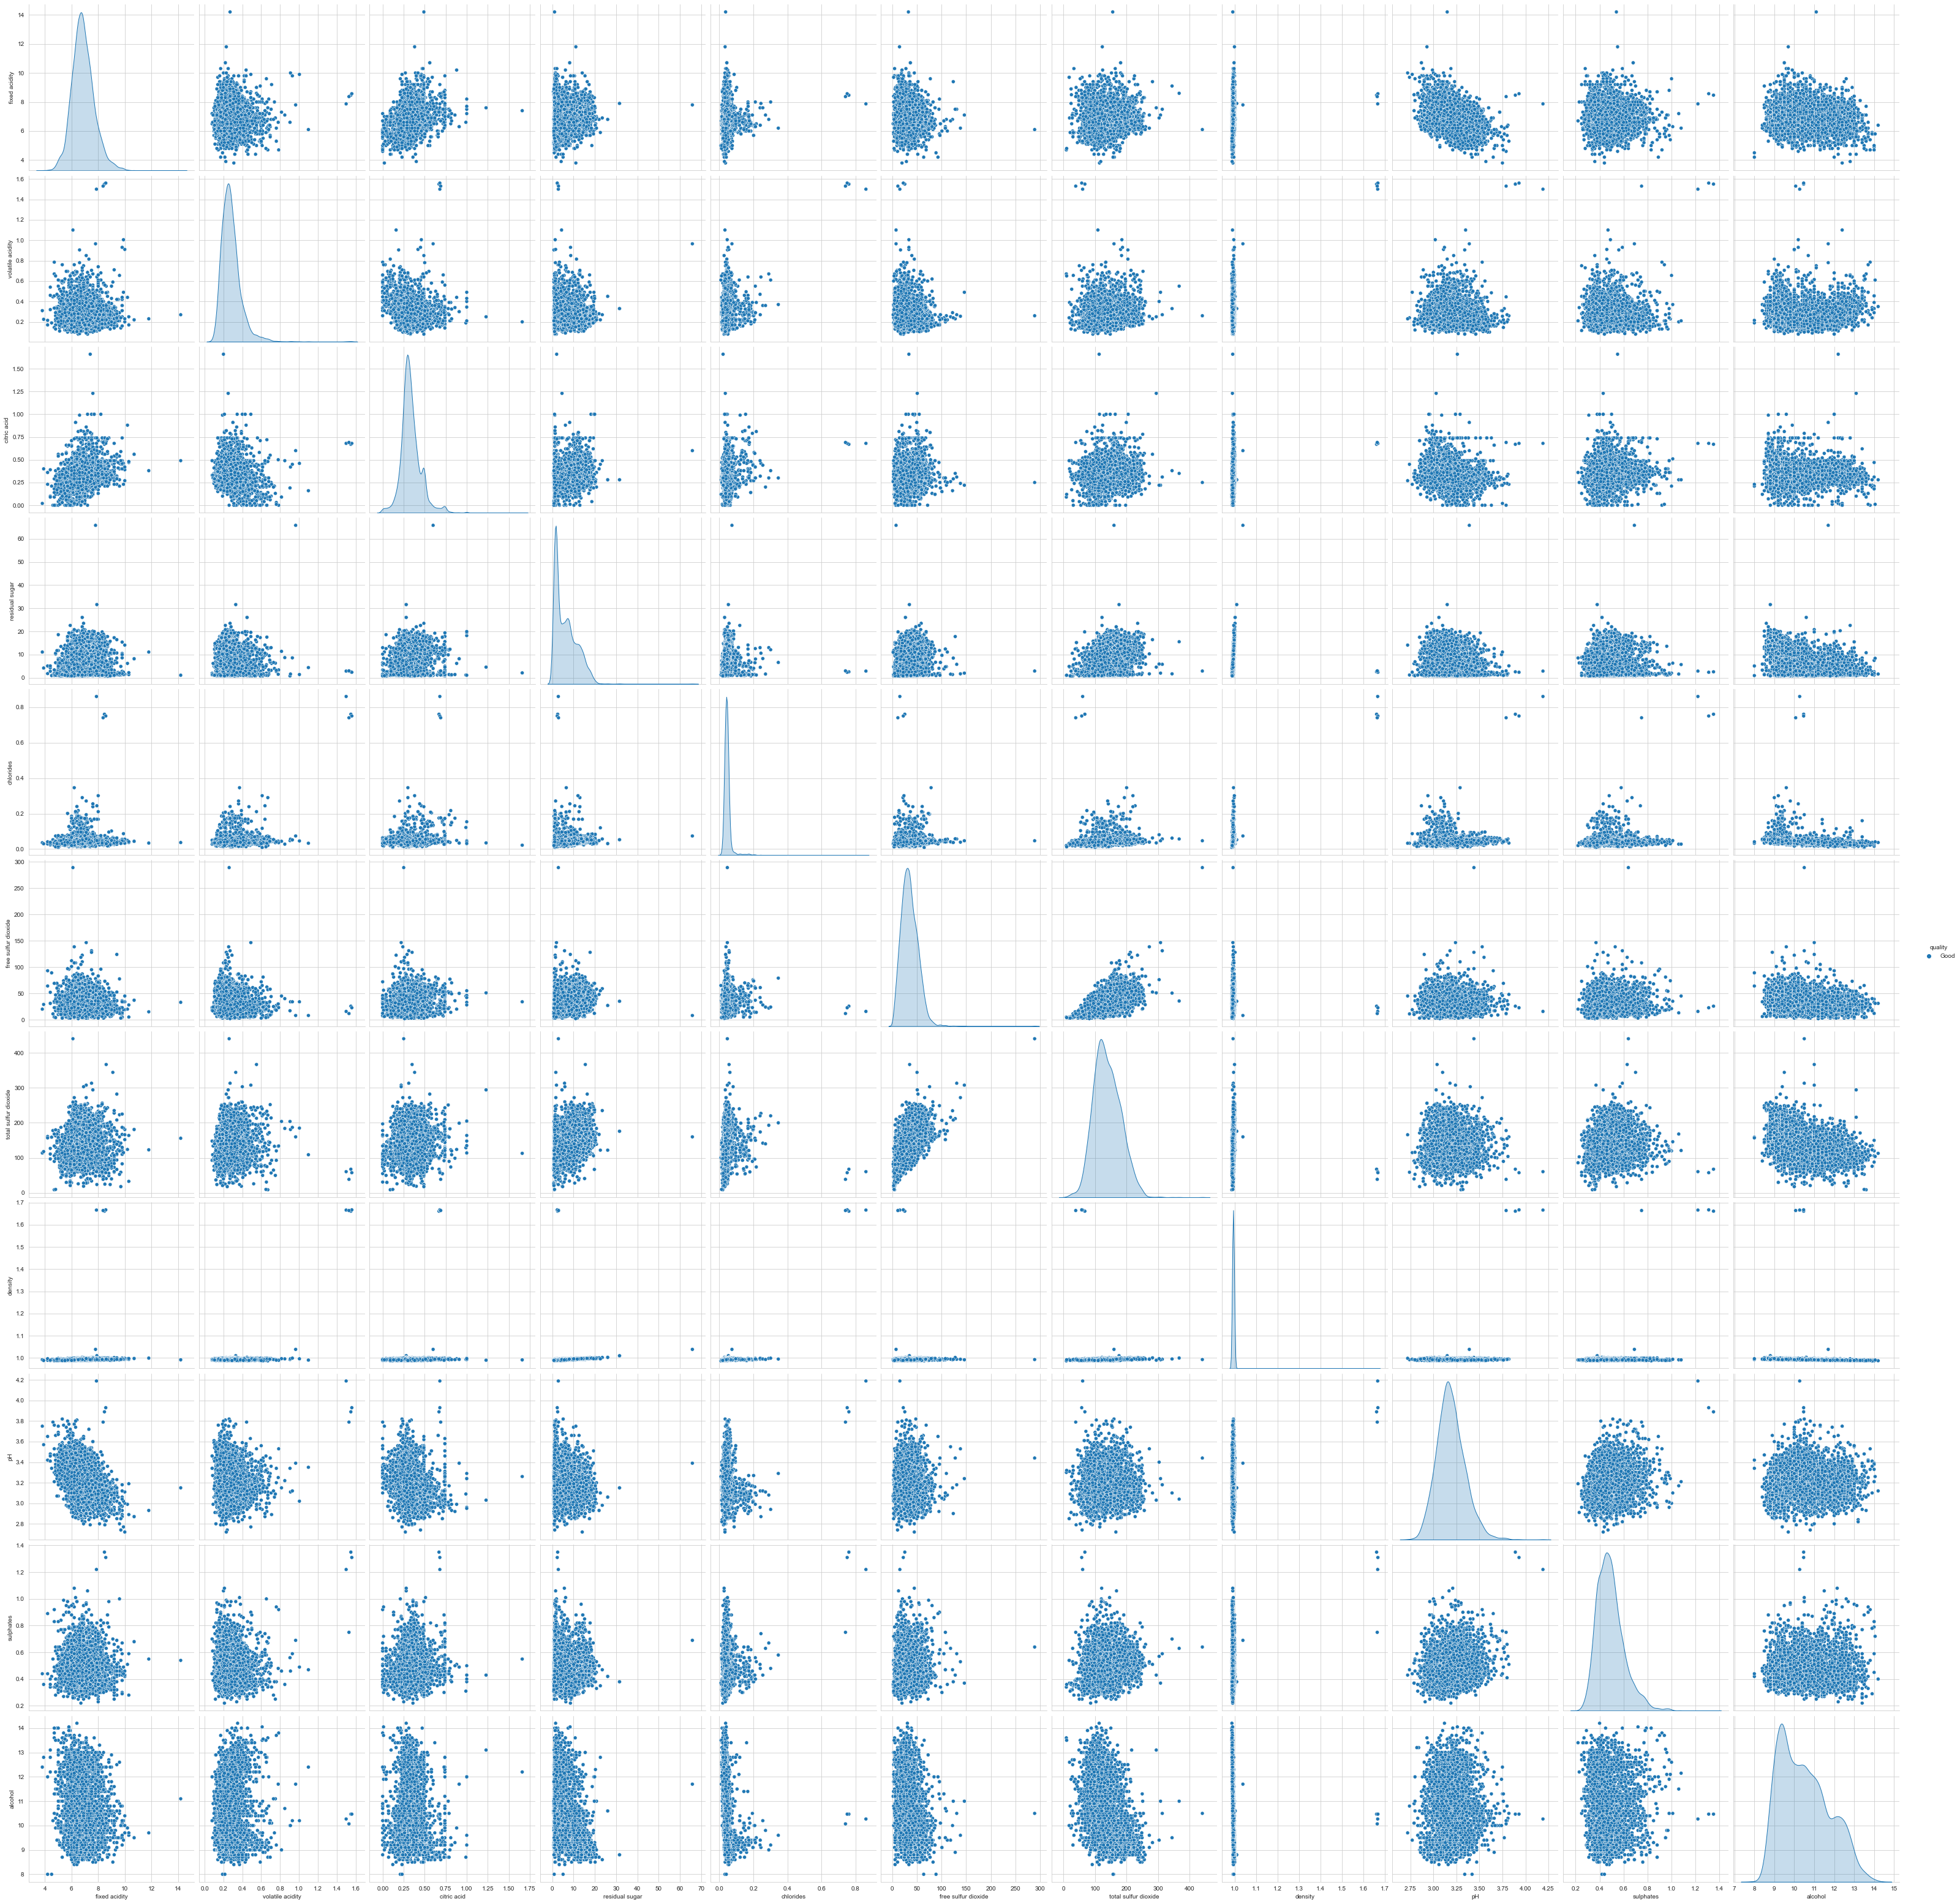

In [42]:
# Paire Plot
plt.figure(figsize = (12,6))
sns.set_style('whitegrid')
sns.pairplot(df_white, hue ='quality', height = 4)
plt.show()

# Data Preprocessing

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train,y_train,x_test,y_test=train_test_split(
#     x_res,y_res,test_size=0.2,random_state=0
# )